In [46]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(10)

In [36]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train4D = X_train.reshape(X_train.shape[0],28,28,1).astype("float32") / 255
X_test4D  = X_test.reshape(X_test.shape[0],28,28,1).astype("float32") / 255 

y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot  = np_utils.to_categorical(y_test)

model = Sequential()
### 卷積層1
model.add(Conv2D(filters = 16,
                 kernel_size = (5,5),
                 padding = "same",
                 input_shape = (28, 28, 1),
                 activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### 卷積層2
model.add(Conv2D(filters = 36,
                 kernel_size = (5,5),
                 padding = "same",
                 activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

### Flatten
### 36*7*7 = 1764個神經元
model.add(Flatten()) 

### 隱藏層
model.add(Dense(units = 128, activation="relu"))
model.add(Dropout(0.5))

### 輸出層
model.add(Dense(units = 10, activation="softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               225920    
__________

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 31s - loss: 0.1355 - acc: 0.9603 - val_loss: 0.0651 - val_acc: 0.9804
Epoch 2/5
 - 30s - loss: 0.0986 - acc: 0.9705 - val_loss: 0.0522 - val_acc: 0.9844
Epoch 3/5
 - 33s - loss: 0.0793 - acc: 0.9760 - val_loss: 0.0435 - val_acc: 0.9877
Epoch 4/5
 - 33s - loss: 0.0679 - acc: 0.9798 - val_loss: 0.0452 - val_acc: 0.9863
Epoch 5/5
 - 30s - loss: 0.0623 - acc: 0.9806 - val_loss: 0.0396 - val_acc: 0.9888


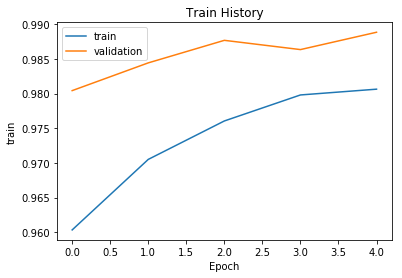

In [39]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
history = model.fit(x = X_train4D,
          y = y_train_OneHot,
          validation_split = 0.2,
          epochs = 5,
          batch_size = 500,
          verbose = 2)
def show_train_history(history,acc,val_acc):
    plt.plot(history.history[acc])
    plt.plot(history.history[val_acc])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
    
show_train_history(history,'acc','val_acc')

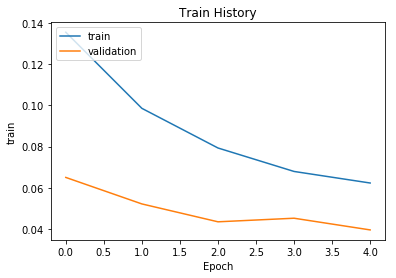

In [40]:
show_train_history(history,'loss','val_loss')

In [41]:
scores = model.evaluate(X_test4D, y_test_OneHot)
scores[1]

10000/10000 [==============================] - 3s 259us/step


0.98950000000000005

In [49]:
prediction = model.predict_classes(X_test4D)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [50]:
def plot_images(images,labels,prediction,idx,num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap="binary")
        title = "label = "+str(prediction[idx])
        if len(prediction) > 0:
            title += ",predict="+str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

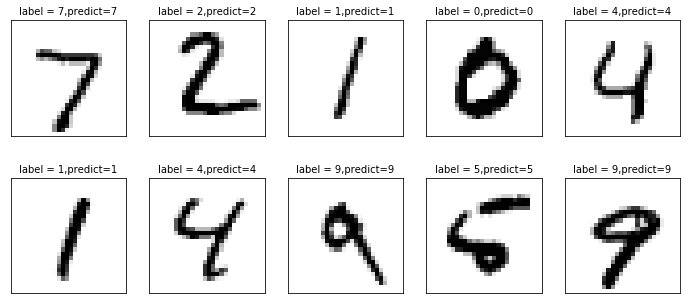

In [51]:
plot_images(X_test, y_test, prediction, idx = 0)

In [52]:
pd.crosstab(y_test,prediction, rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,1,1,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,5,0,1022,0,0,0,0,2,3,0
3,0,0,2,1003,0,2,0,1,2,0
4,0,0,1,0,976,0,1,0,1,3
5,2,0,0,3,0,883,2,0,0,2
6,4,2,0,0,2,1,949,0,0,0
7,1,2,8,3,0,0,0,1013,1,0
8,5,0,3,2,1,1,0,2,958,2
